In [13]:
import pandas as pd
import os


In [14]:
current_dir = os.getcwd()

In [15]:
model_names = ['model_training-v1_weightscale','model_training-v3_focalloss']

In [16]:
model_dirs = ['models_v'+ str(i) for i in [1,3]]
model_sum_df = pd.DataFrame(columns= ['model_name','model_with_parameter' ,'weight', 'epoch','alpha', 'acc', 'precision', 'recall', 'path'])
for i , model_dir in enumerate(model_dirs):
    model_df = pd.read_csv(os.path.join(current_dir, model_dir, 'model_df.csv'))
    model_name = model_names[i]
    for index, row in model_df.iterrows():
        where_epoch = row['Model'].find('_epoch')
        parameter = row['Model'][0:where_epoch]
        model_with_parameter = model_name + '_' + parameter
        if 'weight' in row:
            weight = row['weight']
        else:
            weight = 'None'
        if 'alpha' in row:
            alpha = row['alpha']
        else:
            alpha = 'None'
        path = os.path.join(model_dir, row['Model'])
        model_sum_df.loc[len(model_sum_df)] = [model_name, model_with_parameter,weight, row['epoch'], alpha, row['acc'], row['precision'], row['recall'], path]
model_sum_df

,model_name,model_with_parameter,weight,epoch,alpha,acc,precision,recall,path
0,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,0,None,0.905200,0.191000,0.438600,models_v1\weight_0.25_epoch00_acc0.9052_prec0....
1,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,1,None,0.911300,0.204100,0.436000,models_v1\weight_0.25_epoch01_acc0.9113_prec0....
2,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,2,None,0.915300,0.213400,0.432300,models_v1\weight_0.25_epoch02_acc0.9153_prec0....
3,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,3,None,0.920000,0.226100,0.429600,models_v1\weight_0.25_epoch03_acc0.9200_prec0....
4,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,4,None,0.924100,0.238000,0.426200,models_v1\weight_0.25_epoch04_acc0.9241_prec0....
5,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,5,None,0.927100,0.248200,0.424800,models_v1\weight_0.25_epoch05_acc0.9271_prec0....
6,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,6,None,0.930100,0.257900,0.418400,models_v1\weight_0.25_epoch06_acc0.9301_prec0....
7,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,7,None,0.931300,0.264900,0.425000,models_v1\weight_0.25_epoch07_acc0.9313_prec0....
8,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,8,None,0.933300,0.273200,0.423500,models_v1\weight_0.25_epoch08_acc0.9333_prec0....
9,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,9,None,0.934200,0.277000,0.421900,models_v1\weight_0.25_epoch09_acc0.9342_prec0....


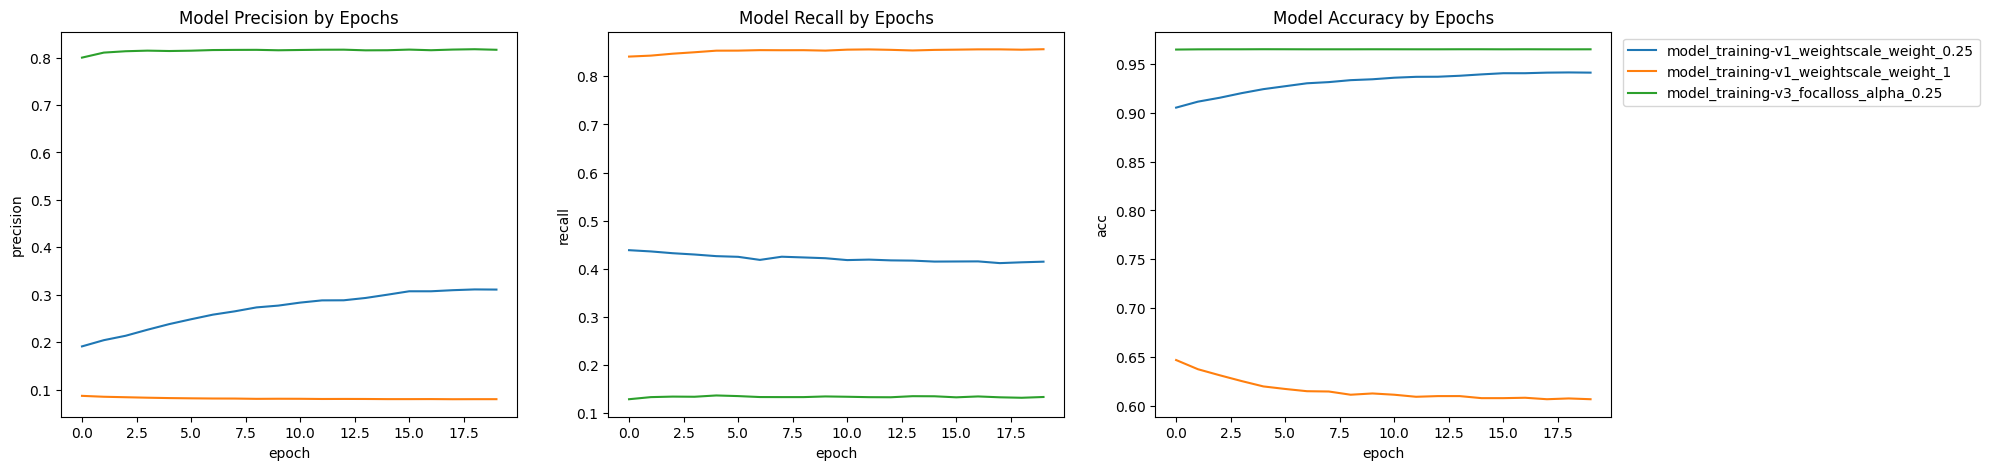

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3,figsize=(20,5))

sns.lineplot(data=model_sum_df, x='epoch', y='precision', hue='model_with_parameter', ax=ax[0],legend=False)
sns.lineplot(data=model_sum_df, x='epoch', y='recall', hue='model_with_parameter', ax=ax[1],legend=False)
sns.lineplot(data=model_sum_df, x='epoch', y='acc', hue='model_with_parameter', ax=ax[2])

ax[0].set_title('Model Precision by Epochs')
ax[1].set_title('Model Recall by Epochs')
ax[2].set_title('Model Accuracy by Epochs')

plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.title('Model Accuracy by Epochs')
plt.show()



In [20]:
model_converged = model_sum_df[model_sum_df['epoch']>10].copy()
model_converged

,model_name,model_with_parameter,weight,epoch,alpha,acc,precision,recall,path
11,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,11,None,0.936700,0.288000,0.419000,models_v1\weight_0.25_epoch11_acc0.9367_prec0....
12,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,12,None,0.936800,0.288200,0.417400,models_v1\weight_0.25_epoch12_acc0.9368_prec0....
13,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,13,None,0.937800,0.293100,0.416900,models_v1\weight_0.25_epoch13_acc0.9378_prec0....
14,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,14,None,0.939200,0.300000,0.414900,models_v1\weight_0.25_epoch14_acc0.9392_prec0....
15,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,15,None,0.940400,0.307200,0.415100,models_v1\weight_0.25_epoch15_acc0.9404_prec0....
16,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,16,None,0.940400,0.307200,0.415300,models_v1\weight_0.25_epoch16_acc0.9404_prec0....
17,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,17,None,0.941000,0.309500,0.411700,models_v1\weight_0.25_epoch17_acc0.9410_prec0....
18,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,18,None,0.941200,0.311100,0.413400,models_v1\weight_0.25_epoch18_acc0.9412_prec0....
19,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,19,None,0.941000,0.310800,0.414700,models_v1\weight_0.25_epoch19_acc0.9410_prec0....
31,model_training-v1_weightscale,model_training-v1_weightscale_weight_1,1.0,11,None,0.609300,0.080100,0.856000,models_v1\weight_1_epoch11_acc0.6093_prec0.080...


In [21]:
acc_summary = model_converged[['model_with_parameter','acc']].groupby('model_with_parameter').mean().sort_values('acc',ascending=False)
acc_summary

,acc
model_with_parameter,
model_training-v3_focalloss_alpha_0.25,0.964878
model_training-v1_weightscale_weight_0.25,0.939389
model_training-v1_weightscale_weight_1,0.608289


In [22]:
precision_summary = model_converged[['model_with_parameter','acc','precision','recall']].groupby('model_with_parameter').mean().sort_values('precision',ascending=False)
precision_summary

,acc,precision,recall
model_with_parameter,,,
model_training-v3_focalloss_alpha_0.25,0.964878,0.816315,0.133423
model_training-v1_weightscale_weight_0.25,0.939389,0.301678,0.415378
model_training-v1_weightscale_weight_1,0.608289,0.079878,0.855489


In [23]:
max_precision_model = precision_summary['precision'].idxmax()
max_precision_model

'model_training-v3_focalloss_alpha_0.25'

In [24]:
recall_summary = precision_summary.sort_values('recall',ascending=False)
recall_summary

,acc,precision,recall
model_with_parameter,,,
model_training-v1_weightscale_weight_1,0.608289,0.079878,0.855489
model_training-v1_weightscale_weight_0.25,0.939389,0.301678,0.415378
model_training-v3_focalloss_alpha_0.25,0.964878,0.816315,0.133423


In [25]:
max_recall_model = recall_summary['recall'].idxmax()
max_recall_model

'model_training-v1_weightscale_weight_1'

In [26]:
print('best model for precision:', max_precision_model, 'with precision of', precision_summary.loc[max_precision_model]['precision'], ', recall: ' ,  recall_summary.loc[max_precision_model]['recall'], ', acc: ', acc_summary.loc[max_precision_model]['acc']),print('best model for recall:', max_recall_model, 'with recall of', recall_summary.loc[max_recall_model]['recall'], 'precision: ', precision_summary.loc[max_recall_model]['precision'], ', acc: ', acc_summary.loc[max_recall_model]['acc'])

best model for precision: model_training-v3_focalloss_alpha_0.25 with precision of 0.8163148170586921 , recall:  0.13342284692768475 , acc:  0.9648783604649773
best model for recall: model_training-v1_weightscale_weight_1 with recall of 0.8554888888888889 precision:  0.07987777777777777 , acc:  0.6082888888888889


(None, None)

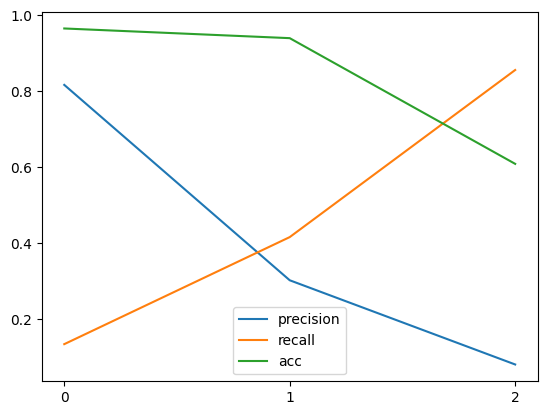

In [27]:
plt.plot(precision_summary.index, precision_summary[['precision','recall','acc']], label=['precision','recall','acc'])
plt.xticks(ticks= [i for i in range(len(precision_summary.index))],labels = [i for i in range(len(precision_summary.index))])
plt.legend()
plt.show()

In [28]:
# find the balanced model
def find_balance(row):
    if row['precision'] > row['recall'] :
        return row['recall'] / row['precision']
    elif row['recall'] > row['precision'] :
        return row['precision'] / row['recall']
    else:
        return 1.0

model_converged['p_r_ratio'] = model_converged.apply(find_balance, axis=1)

model_converged = model_converged.sort_values('p_r_ratio', ascending=False)
model_converged.head(10)

,model_name,model_with_parameter,weight,epoch,alpha,acc,precision,recall,path,p_r_ratio
18,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,18,None,0.94120,0.311100,0.413400,models_v1\weight_0.25_epoch18_acc0.9412_prec0....,0.752540
17,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,17,None,0.94100,0.309500,0.411700,models_v1\weight_0.25_epoch17_acc0.9410_prec0....,0.751761
19,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,19,None,0.94100,0.310800,0.414700,models_v1\weight_0.25_epoch19_acc0.9410_prec0....,0.749457
15,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,15,None,0.94040,0.307200,0.415100,models_v1\weight_0.25_epoch15_acc0.9404_prec0....,0.740063
16,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,16,None,0.94040,0.307200,0.415300,models_v1\weight_0.25_epoch16_acc0.9404_prec0....,0.739706
14,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,14,None,0.93920,0.300000,0.414900,models_v1\weight_0.25_epoch14_acc0.9392_prec0....,0.723066
13,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,13,None,0.93780,0.293100,0.416900,models_v1\weight_0.25_epoch13_acc0.9378_prec0....,0.703046
12,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,12,None,0.93680,0.288200,0.417400,models_v1\weight_0.25_epoch12_acc0.9368_prec0....,0.690465
11,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.25,0.25,11,None,0.93670,0.288000,0.419000,models_v1\weight_0.25_epoch11_acc0.9367_prec0....,0.687351
53,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.25,None,13,0.25,0.96492,0.815229,0.135062,models_v3\alpha_0.25_epoch13_acc0.9649_prec0.8...,0.165674


In [23]:
# coppy the best model to current directory for easy access
import shutil
os.makedirs(os.path.join(current_dir, 'best_model'), exist_ok=True)
balance_model = model_converged.iloc[0]
shutil.copyfile(os.path.join(current_dir, balance_model['path']), os.path.join(current_dir, 'best_model', 'balance.pth'))
best_precision_model = model_converged[model_converged['model_with_parameter'] == max_precision_model].sort_values('precision', ascending=False).iloc[0]
shutil.copyfile(os.path.join(current_dir, best_precision_model['path']), os.path.join(current_dir, 'best_model', 'best_precision.pth'))
best_recall_model = model_converged[model_converged['model_with_parameter'] == max_recall_model].sort_values('recall', ascending=False).iloc[0]
shutil.copyfile(os.path.join(current_dir, best_recall_model['path']), os.path.join(current_dir, 'best_model','best_recall.pth'))

'e:\\iCloudDrive\\master of applied computing\\capstone project\\high_dense_high_rise\\best_model\\best_recall.pth'

In [24]:
model_sum_df.to_csv(os.path.join(current_dir, 'model_summary.csv'), index=False)